In [1]:
from bw_recipe_2016 import (
    FreshwaterEutrophication,
    get_biosphere_database, 
    extract_recipe,
)

In [2]:
data = extract_recipe()[9]

In [3]:
biosphere = get_biosphere_database()

In [4]:
for x in sorted({(x['name'].lower(), x['categories'][0]) for x in biosphere}):
    print(x)

('1,3-dioxolan-2-one', 'water')
('1,4-butanediol', 'air')
('1,4-butanediol', 'water')
('1-pentanol', 'air')
('1-pentanol', 'water')
('1-pentene', 'air')
('1-pentene', 'water')
('2,2,4-trimethyl pentane', 'air')
('2,4-d', 'air')
('2,4-d', 'soil')
('2,4-d amines', 'air')
('2,4-d amines', 'soil')
('2,4-d amines', 'water')
('2,4-d ester', 'air')
('2,4-d ester', 'soil')
('2,4-d ester', 'water')
('2,4-db', 'air')
('2,4-db', 'soil')
('2,4-db', 'water')
('2,4-di-tert-butylphenol', 'water')
('2-amino-3-chloro-1,4-naphthoquinone', 'soil')
('2-aminopropanol', 'air')
('2-aminopropanol', 'water')
('2-chlorobenzaldehyde', 'water')
('2-methyl pentane', 'air')
('2-methyl-1-propanol', 'air')
('2-methyl-1-propanol', 'water')
('2-methyl-2-butene', 'air')
('2-methyl-2-butene', 'water')
('2-nitrobenzoic acid', 'air')
('2-phenylphenol', 'soil')
('2-propanol', 'air')
('2-propanol', 'water')
('3-methyl-1-butanol', 'air')
('3-methyl-1-butanol', 'water')
('4-methyl-2-pentanol', 'water')
('4-methyl-2-pentanone',

In [4]:
sorted([
    (x['name'], x['categories']) 
    for x in biosphere 
    if x['name'].lower() in ("phosphoric acid", "phosphorus", "phosphate")
])

[('Phosphate', ('water',)),
 ('Phosphate', ('water', 'ground-')),
 ('Phosphate', ('water', 'ground-, long-term')),
 ('Phosphate', ('water', 'ocean')),
 ('Phosphate', ('water', 'surface water')),
 ('Phosphoric acid', ('air',)),
 ('Phosphoric acid', ('air', 'low population density, long-term')),
 ('Phosphoric acid', ('air', 'lower stratosphere + upper troposphere')),
 ('Phosphoric acid', ('air', 'non-urban air or from high stacks')),
 ('Phosphoric acid', ('air', 'urban air close to ground')),
 ('Phosphoric acid', ('water',)),
 ('Phosphorus', ('air',)),
 ('Phosphorus', ('air', 'low population density, long-term')),
 ('Phosphorus', ('air', 'lower stratosphere + upper troposphere')),
 ('Phosphorus', ('air', 'non-urban air or from high stacks')),
 ('Phosphorus', ('air', 'urban air close to ground')),
 ('Phosphorus', ('soil',)),
 ('Phosphorus', ('soil', 'agricultural')),
 ('Phosphorus', ('soil', 'forestry')),
 ('Phosphorus', ('soil', 'industrial')),
 ('Phosphorus', ('water',)),
 ('Phosphorus'

In [5]:
gw = FreshwaterEutrophication(data, biosphere)

In [6]:
gw.apply_strategies()

Applying strategy: fix_perspective_string
Applying strategy: generic_reformat
Applying strategy: split_synonyms
Applying strategy: more_synonyms
Applying strategy: fix_unit_string
Applying strategy: name_matcher
Applying strategy: add_water_category
Applying strategy: drop_last_name_component
Applying strategy: match_single
Applied 9 strategies in 0.02 seconds


In [7]:
gw.data[0]

{'name': ('ReCiPe 2016', 'v1.1 (20180117)', 'FEP'),
 'unit': 'kg P-eq. to freshwater/kg',
 'filename': 'ReCiPe2016_CFs_v1.1_20180117.xlsx',
 'description': '',
 'exchanges': [{'name': 'phosphorus',
   'compartment': 'freshwater',
   'amount': 1.0,
   'synonyms': [],
   'categories': ('water', 'surface water'),
   'input': ('biosphere3', 'b2631209-8374-431e-b7d5-56c96c6b6d79')},
  {'name': 'phosphate',
   'compartment': 'freshwater',
   'amount': 0.33,
   'synonyms': [],
   'categories': ('water', 'surface water'),
   'input': ('biosphere3', '1727b41d-377e-43cd-bc01-9eaba946eccb')},
  {'name': 'Phosphoric acid',
   'compartment': 'freshwater',
   'amount': 0.32,
   'synonyms': [],
   'categories': ('water',),
   'input': ('biosphere3', 'cefa3637-739c-5e9f-99a6-2456e6a44772')},
  {'name': 'Phosphorus pentoxide',
   'compartment': 'freshwater',
   'amount': 0.22,
   'synonyms': [],
   'categories': ('water', 'surface water')},
  {'name': 'phosphorus',
   'compartment': 'agricultural soil'

In [8]:
gw.write_excel("freshwater_eutrophication")

Wrote matching file to:
/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b/output/lcia-matching-freshwater_eutrophication.xlsx


In [9]:
gw.statistics()

1 methods
12 cfs
6 unlinked cfs


(1, 12, 6)

In [ ]:
for x in gw.unlinked:
    if c.match(x['name'], search=False):
        print(x['name'])

In [10]:
for x in gw.unlinked:
    print(x['name'])

Phosphorus pentoxide
phosphate
Phosphoric acid
Phosphorus pentoxide
Phosphoric acid
Phosphorus pentoxide


In [11]:
comp = gw.compare_to_previous()

In [16]:
import bw2data

for flow, cf in bw2data.Method(gw.previous_reference).load():
    print(bw2data.get_activity(flow))

'Phosphate' (kilogram, None, ('water', 'ground-'))
'Phosphate' (kilogram, None, ('water', 'ground-, long-term'))
'Phosphate' (kilogram, None, ('water', 'surface water'))
'Phosphate' (kilogram, None, ('water',))
'Phosphoric acid' (kilogram, None, ('water',))
'Phosphorus' (kilogram, None, ('soil', 'agricultural'))
'Phosphorus' (kilogram, None, ('soil', 'forestry'))
'Phosphorus' (kilogram, None, ('soil', 'industrial'))
'Phosphorus' (kilogram, None, ('soil',))
'Phosphorus' (kilogram, None, ('water', 'ground-'))
'Phosphorus' (kilogram, None, ('water', 'ground-, long-term'))
'Phosphorus' (kilogram, None, ('water', 'surface water'))
'Phosphorus' (kilogram, None, ('water',))


In [12]:
[(key, len(comp[key])) for key in comp]

[('found', 3), ('missing', 3), ('reference', 3)]

Present in previous ReCiPe, missing here

In [13]:
comp['reference']

{'phosphate', 'phosphoric acid', 'phosphorus'}

In [14]:
comp['found']

{'phosphate', 'phosphoric acid', 'phosphorus'}

In [15]:
sorted(comp['reference'].difference(comp['found']))

[]

In [ ]:
c['found']

In [ ]:
c['missing']

In [17]:
gw.drop_unlinked()

Applying strategy: drop_unlinked_cfs
Applied 1 strategies in 0.00 seconds


In [18]:
gw.write_methods(overwrite=True)

Wrote 1 LCIA methods with 6 characterization factors


In [19]:
gw.data[0]['name']

('ReCiPe 2016', 'v1.1 (20180117)', 'FEP')

# Compare to previous ReCiPe method

In [20]:
%matplotlib inline

In [21]:
import bw2data, bw2calc
import pyprind
import seaborn as sb
import numpy as np

In [22]:
keys = sorted([x.key for x in bw2data.Database("ecoinvent 3.6 cutoff")])

In [23]:
results_reference, results_2016 = [], []

In [24]:
lca = bw2calc.LCA({keys[0]: 1}, gw.previous_reference)
lca.lci()
lca.lcia()

In [25]:
reference_cm = lca.characterization_matrix.copy()

In [27]:
lca.switch_method(('ReCiPe 2016', 'v1.1 (20180117)', 'FEP'))

In [28]:
lca.characterization_matrix.sum(), reference_cm.sum()

(1.7500000074505806, 7.64000004529953)

In [29]:
new_cm = lca.characterization_matrix.copy()

In [30]:
for key in pyprind.prog_bar(keys):
    lca.redo_lci({key: 1})
    results_reference.append((reference_cm * lca.inventory).sum())
    results_2016.append((new_cm * lca.inventory).sum())    

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:23


/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


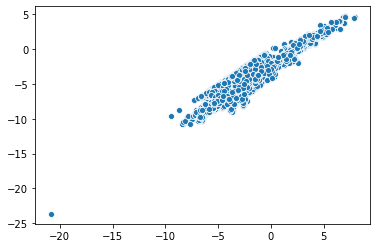

In [31]:
sb.scatterplot(np.log10(np.array(results_reference)), np.log10(np.array(results_2016)))

In [22]:
def masked_ratio(a, b):
    a, b = np.array(a), np.array(b)
    mask = (a != 0) * (b != 0)
    return a / b

/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


OverflowError: cannot convert float infinity to integer

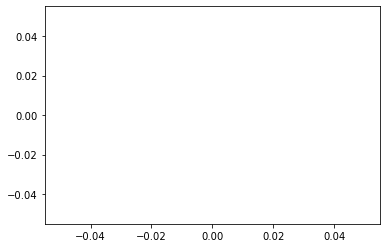

In [23]:
sb.distplot(masked_ratio(results_2016, results_reference))

In [24]:
def abnormal_ratio(a, b):
    if not a or not b:
        return
    ratio = abs(a / b)
    if 0.8 < ratio < 1.25:
        return
    return ratio

In [ ]:
exceptions = sorted([
    (abnormal_ratio(results_2016[i], results_reference[i]), bw2data.get_activity(key)) 
    for i, key in enumerate(keys) 
    if abnormal_ratio(results_2016[i], results_reference[i])
], reverse=True)

In [ ]:
len(exceptions)

In [ ]:
exceptions[:10]

In [ ]:
lca.redo_lci({exceptions[0][1]: 1})
lca.characterized_inventory = new_cm * lca.inventory